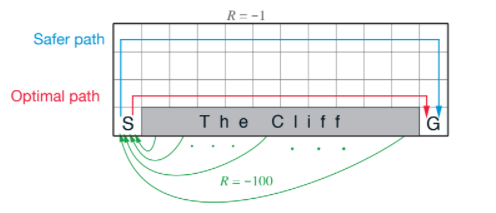

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the MDP:
# - S is the set of pairs (r, c) with rows r in 0..6 and cols c in 0..9
# - A is the set 0..3 for up, down, right, left
# - gamma is 1 (undiscounted episodic task)
# - Psa is deterministic motion on the grid with a wind function, implemented by env(s, a)
# - R is -1 everywhere except the goal (7, 3)
# - Start state is always (3, 0)

gamma = 1
s_initial = (0, 0)
s_terminal = (0, 10)

def reward(s):
    if s == s_terminal:
        return 100
    elif s[0] == 0 and s[1]>0 and s[1]<10:
        return -200
    else:
        return -1       
        
def env(s, a):
    srow = s[0]
    scol = s[1]
    
    # wind = 0    
    # if scol == 3 or scol == 4 or scol == 5 or scol == 8:
    #     wind = 1
    # elif scol == 6 or scol == 7:
    #     wind = 2
        
    if a == 0:
        srow += 1
    elif a == 1:
        srow -= 1
    elif a == 2:
        scol += 1
    elif a == 3:
        scol -= 1     
    
    if srow > 3:
        srow = 3
    elif srow < 0:
        srow = 0
        
    if scol < 0:
        scol = 0
    elif scol > 10:
        scol = 10
     
    #cliff
    if srow == 0 and scol>0 and scol<10:
        srow = 0
        scol = 0

    return (srow, scol), reward((srow, scol))

In [4]:
def epsilon_greedy(Q, s, epsilon):
    if np.random.uniform() < epsilon:
        return np.random.randint(n_actions)
    else:
        return np.argmax(Q[s])

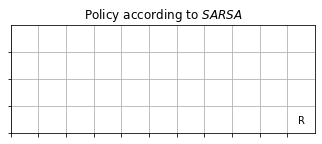

In [ ]:
# Inputs: alpha, epsilon

alpha = 0.5
epsilon = 0.2
n_episodes = 170
t = 0
episode_time_steps = [0]
# Initialize Q to 0 for all states, actions

For each episode



# n_episodes = 170
# t = 0
# episode_time_steps = [0]
# for episode in range(n_episodes):
#     s = s_initial
#     a = epsilon_greedy(Q, s, epsilon)
#     while s != s_terminal:
#         sprime, r = env(s, a)
#         aprime = epsilon_greedy(Q, sprime, epsilon)
#         Q[s][a] = Q[s][a] + alpha * (r + gamma * Q[sprime][aprime] - Q[s][a])
#         t += 1
#         s = sprime
#         a = aprime
#     episode_time_steps.append(t)

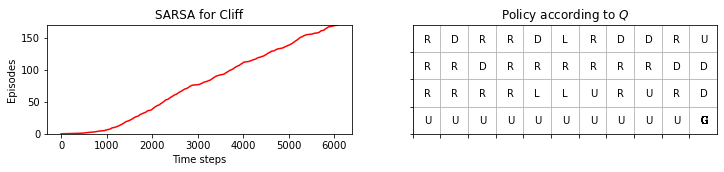

In [55]:
plt.figure(figsize=(12, 2))
plt.subplot(1, 2, 1)
plt.plot(episode_time_steps, range(n_episodes+1), 'r-')
plt.xlabel('Time steps')
plt.ylabel('Episodes')
plt.ylim(0, 170)
plt.title('SARSA for Cliff')
ax = plt.subplot(1, 2, 2)
plt.xlim(0, 11)
plt.ylim(0, 4)
plt.xticks(np.arange(0, 11, 1))
plt.yticks(np.arange(0, 4, 1))
ax.axes.get_xaxis().set_ticklabels([])
ax.axes.get_yaxis().set_ticklabels([])
plt.grid()
action_names = ['U', 'D', 'R', 'L']
for srow in range(4):
    for scol in range(11):
        s = (srow, scol)
        a = np.argmax(Q[s])
        plt.text(scol+0.4, srow+0.35, action_names[a])
        plt.text(10+0.4, 0+0.35, 'G')
plt.title('Policy according to $Q$')
plt.show()